<a href="https://colab.research.google.com/github/harsh15998/classification/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Libraries for data manipulation
import pandas as pd
import numpy as np
#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from wordcloud import WordCloud
#Libraries to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
tweets_df = pd.read_csv("/content/drive/MyDrive/classification/Coronavirus Tweets.csv", encoding='latin-1')

In [4]:
#Creating a copy of the dataset
df=tweets_df.copy()

In [5]:
#first look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
#Checking basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
#Checking the shape of the dataset
print("The dataset contains",df.shape[0],"rows")
print("The dataset contains",df.shape[1],"columns")

The dataset contains 41157 rows
The dataset contains 6 columns


In [8]:
#Checking for duplicates
print("The number of duplicates are:",len(df[df.duplicated()]))

The number of duplicates are: 0


In [9]:
#Getting the count of null values in all the columns
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

We can observe that only the column 'Location' contains null values. But we are not considering that column for sentiment analysis. Hence there is no need for null value treatment.


Let's create a word cloud showing the different variables in the given dataset.

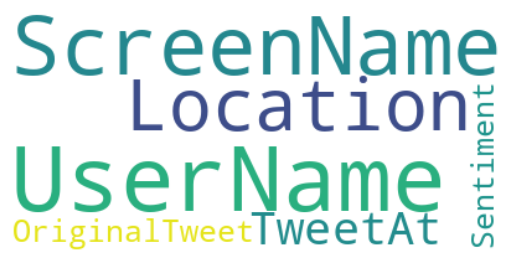

In [10]:
text1 = " ".join(title for title in df.columns)
# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(text1)
# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
#Unique number of values in each column
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

It is clear that screenName and UserName are unique for each observation in the given dataset. Therefore we will remove them.

In [12]:
#Drop UserName and ScreenName
df.drop(["UserName","ScreenName"],axis=1,inplace=True)

Target variable analysis

Now, let's analyze the target variable, Sentiment

In [13]:
#Checking subcategories of target variable
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

We ave 5 subcategories for Sentiment- 'Neutral', 'Positive', 'Extremely Negative', 'Negative' and 'Extremely Positive'

In [14]:
#number of tweets in each subcategory of target variable
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of tweets')

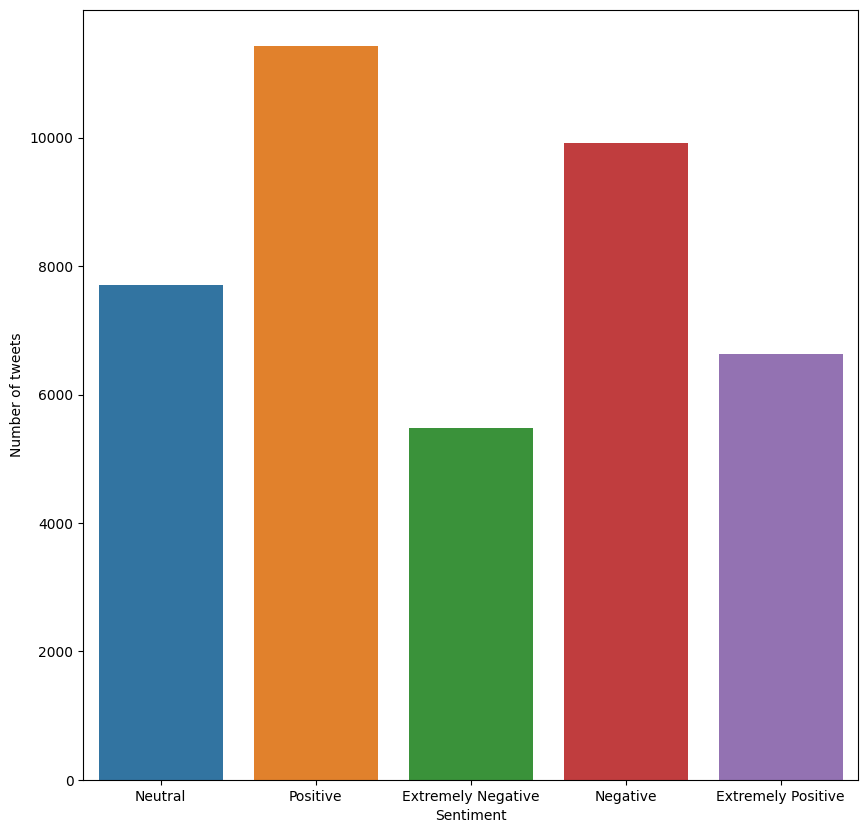

In [15]:
#Setting the heigt and width of the graph
plt.rcParams["figure.figsize"]=10,10
#Plotting the total number of tweets for each subcategory in the target variable
sns.countplot(x="Sentiment", data=df)
plt.ylabel("Number of tweets")

Converting Sentiment

We will convert this 5-class classification problem into a 3-class classification problem by merging Extremely Positive tweets with positive tweets and Extremely Negative tweets with negative tweets.

In [16]:
def Sentiment_Grouping(sentiment):
  if sentiment == "Extremely Positive":
    return "Positive"
  elif sentiment == "Extremely Negative":
    return "Negative"
  else:
    return sentiment

In [17]:
#Apply the Sentiment_Grouping function on the Sentiment column
df["Sentiment"] = df["Sentiment"].apply(Sentiment_Grouping)

In [18]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

The types of sentiments after grouping are:

1.Neutral

2.Positive


3.Negative


<Axes: xlabel='Sentiment', ylabel='count'>

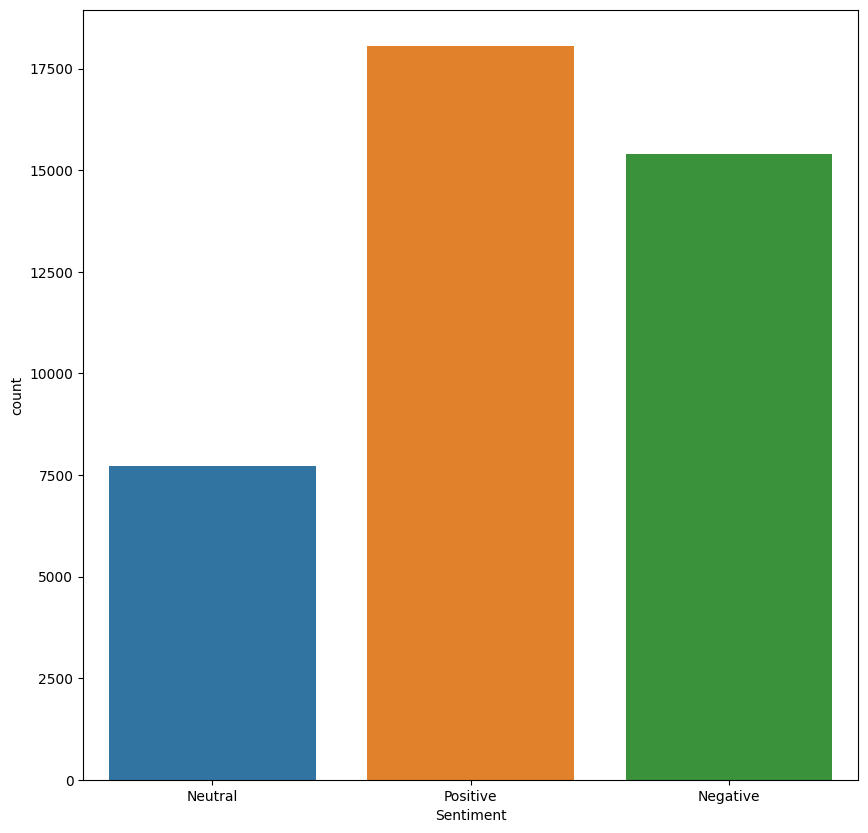

In [19]:
#Plotting the total number of tweets for each subcategory in the target variable after the transformation
plt.rcParams["figure.figsize"]=10,10
sns.countplot(x="Sentiment", data=df)

In [20]:
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

Locations Analysis

Let us find out top 10 locations of tweet

In [21]:
#Number of tweets in each location
Location_df = df['Location'].value_counts().rename_axis('Location').reset_index(name='Count')
Location_df

,Location,Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
...,...,...
12215,Staffordshire Moorlands,1
12216,Kithchener ON,1
12217,"Tulsa, Ok",1
12218,"Watford, South Oxhey, Bushey",1


In [22]:
#top locations of tweet
Location_df.head(10)

,Location,Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


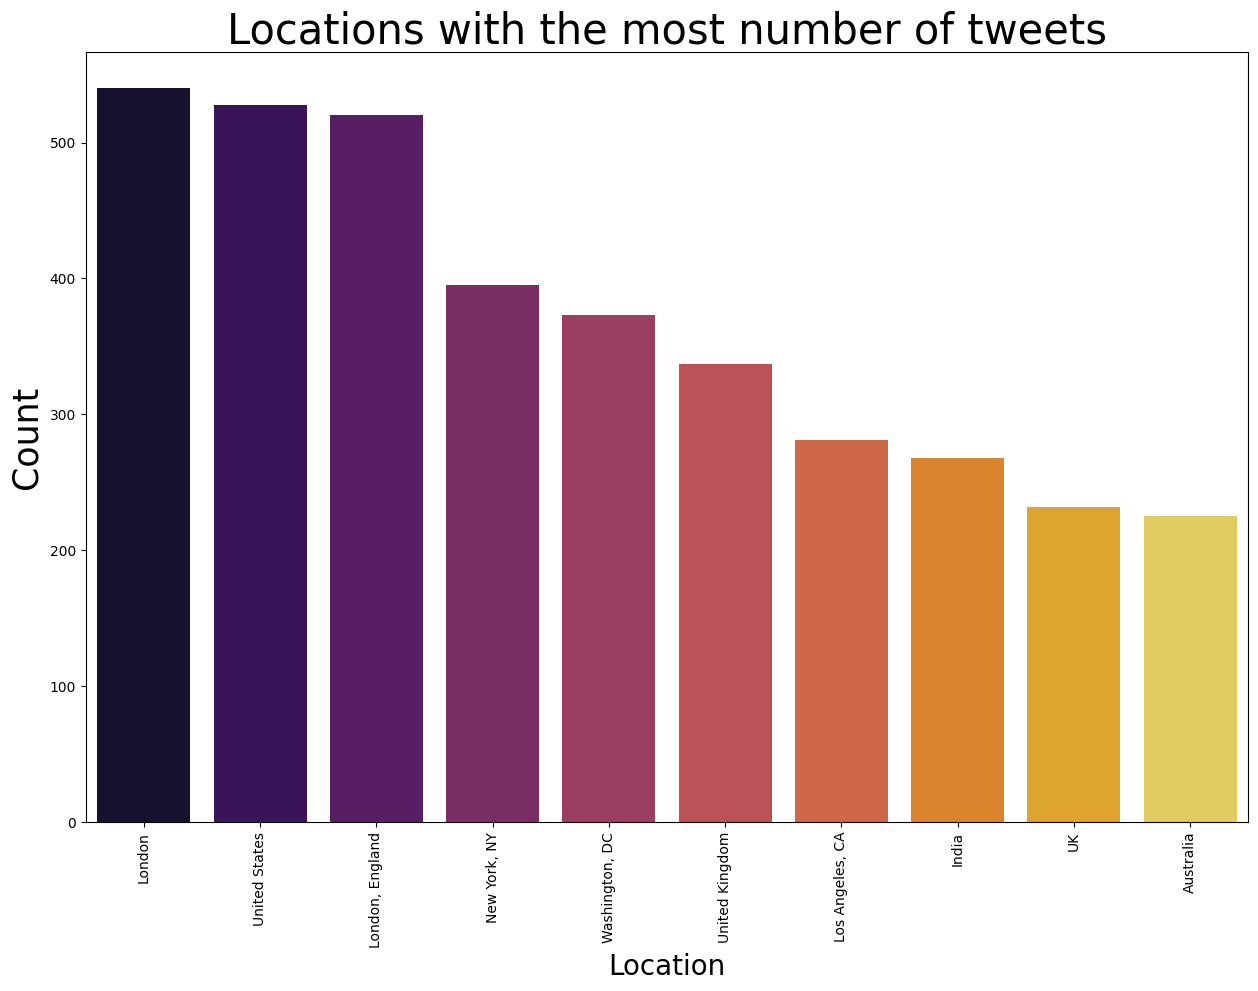

In [23]:


plt.rcParams["figure.figsize"]=(15,10)
sns.barplot(x=Location_df['Location'][0:10], y=Location_df['Count'][0:10], palette='inferno')
plt.xticks(rotation=90)
plt.title('Locations with the most number of tweets', fontsize=30)
plt.xlabel('Location', fontsize=20)
plt.ylabel('Count', fontsize=25)
plt.show()


Most of the tweets are from United States, London and New York

Date Analysis

In [24]:
#Converting the TweetAt column to a datetime object
df["TweetAt"] = pd.to_datetime(df["TweetAt"])

In [25]:
#Obtaining the time period of the dataset
print("Our dataset contains tweets from {}th {} {} to {}th {} {}".format(df["TweetAt"].min().day, df["TweetAt"].min().month_name(), df["TweetAt"].min().year,
         df["TweetAt"].max().day, df["TweetAt"].max().month_name(), df["TweetAt"].max().year))

Our dataset contains tweets from 4th January 2020 to 4th December 2020


In [26]:
#Creating new column for day and month from date colum "TweetAt"
df['day'] = pd.DatetimeIndex(df['TweetAt']).day
df['month'] = pd.DatetimeIndex(df['TweetAt']).month
#Creating a column containing name of the weekday
df["week day"]=pd.DatetimeIndex(df['TweetAt']).day_name()

In [27]:
#Checking the top 5 row of our dataset
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,Monday


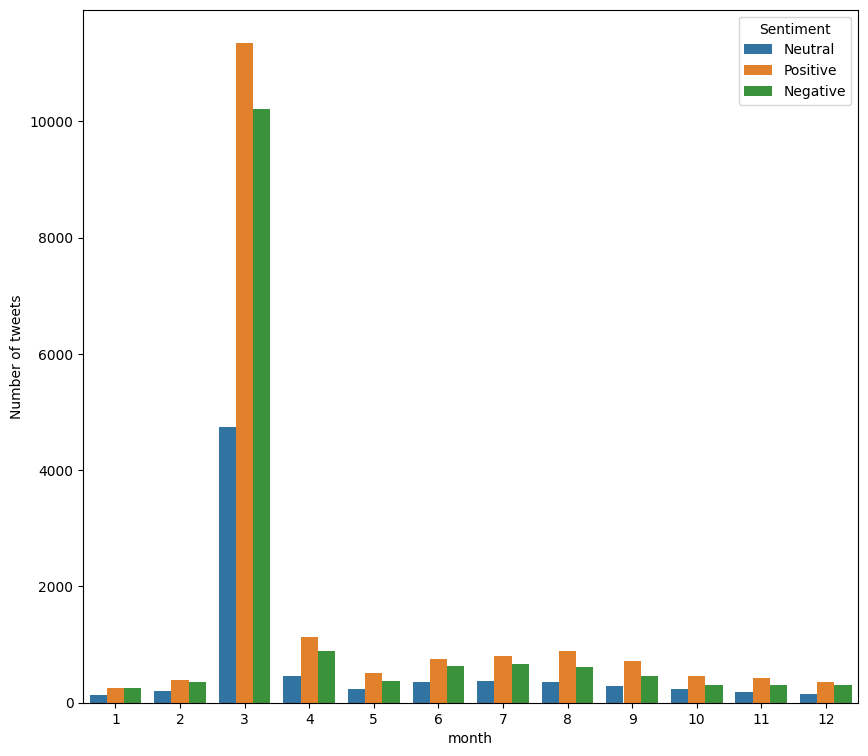

In [28]:
#Plotting total number of tweets for each sentiment over the months
plt.rcParams["figure.figsize"]=(10,9)
ax = sns.countplot(x="month", hue="Sentiment", data=df)
plt.ylabel("Number of tweets")
plt.show()

It is clear the most number of tweets was created in the month of March.

Let's analyze the tweet count on a daily basis in the month of March

Text(0, 0.5, 'Number of tweets')

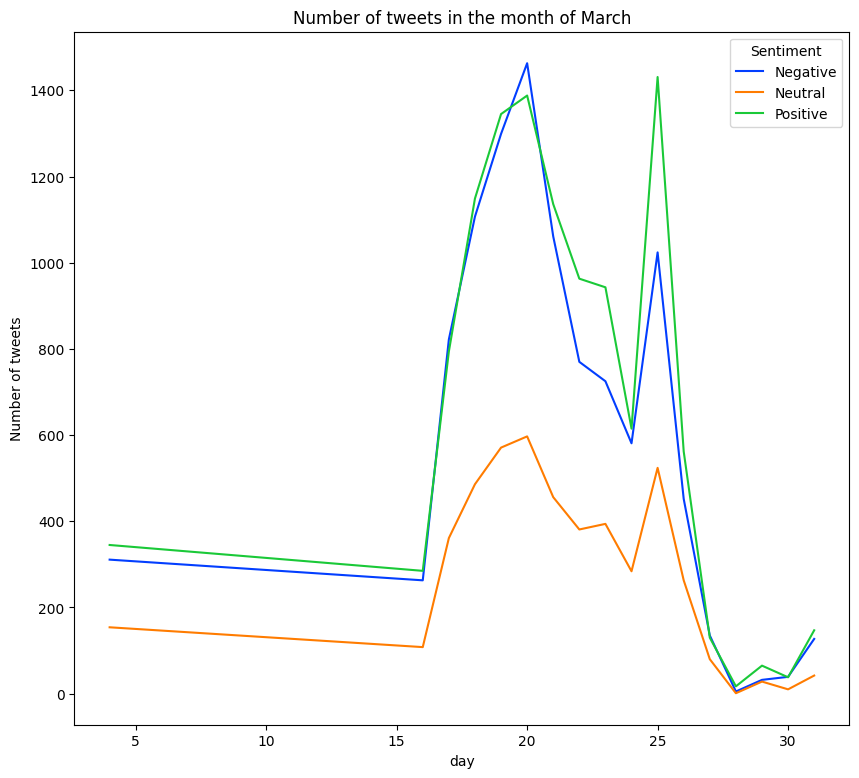

In [29]:
#Creating a subset of our dataframe that will only contains tweets from the month of march
day_analysis = df[df["month"] == 3].copy()
#Grouping our dataset on the basis of Day and sentiment to get the number of tweets tweeted on each day in the month of march belonging to each sentiment
daySentiment_groupby = day_analysis.groupby(["day" , "Sentiment"]).agg({ "OriginalTweet" : "count"}).reset_index()
sns.lineplot(x = "day" , y ="OriginalTweet" , hue="Sentiment" ,  data = daySentiment_groupby , palette = 'bright' )
plt.title("Number of tweets in the month of March")
plt.ylabel("Number of tweets")

Let's check out the day when people tweet the most.

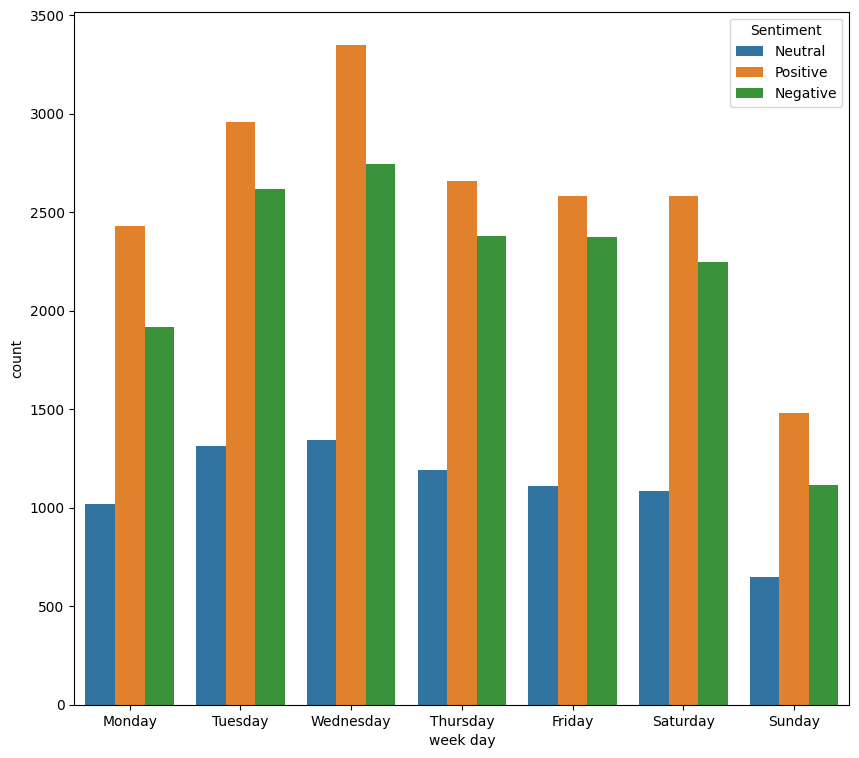

In [30]:
#Checking the day on which more tweets are being created
ax = sns.countplot(x="week day", hue="Sentiment", data=df)

Tweet length analysis

Lets us try to get insights regarding tweet length.

In [31]:
#Creating a new column 'length' by calculating the length of tweets
df['length']=df['OriginalTweet'].apply(len)
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,length
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday,111
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday,237
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday,131
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday,306
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,Monday,310


<Axes: ylabel='Frequency'>

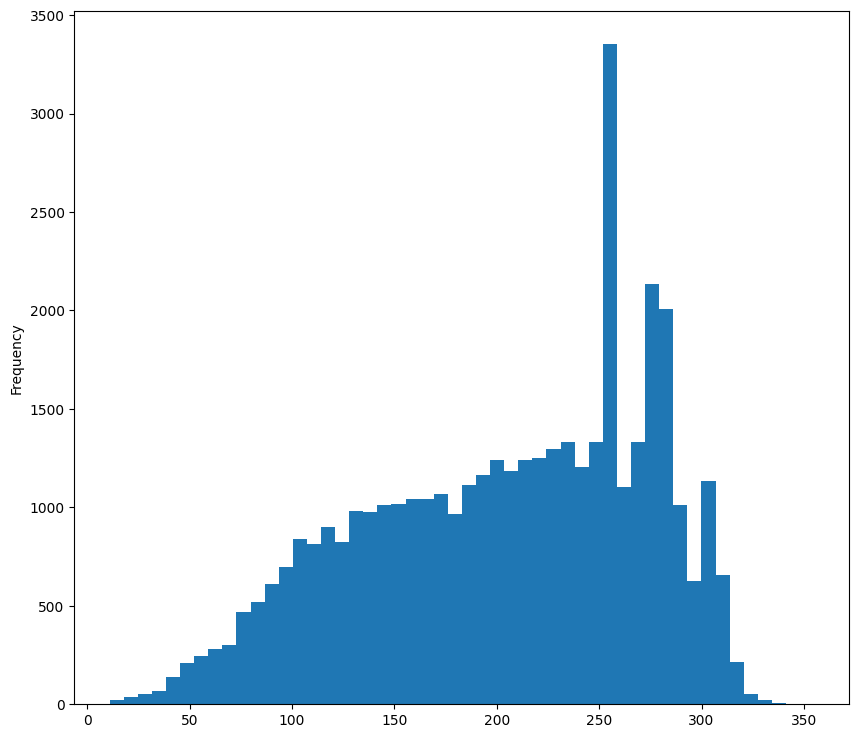

In [32]:
#Checking distribution of length of tweets
df['length'].plot(bins=50,kind='hist')

In [33]:
def show_dist(df, col):

  '''Function is to show distribution of any particular column for each of the different sentiment'''

  bins = np.arange(df[col].min(), df[col].max() + 1)
  g = sns.FacetGrid(df, col='Sentiment', height=5, hue='Sentiment', palette="bright")
  g = g.map(sns.histplot, col, kde=False, bins=bins)

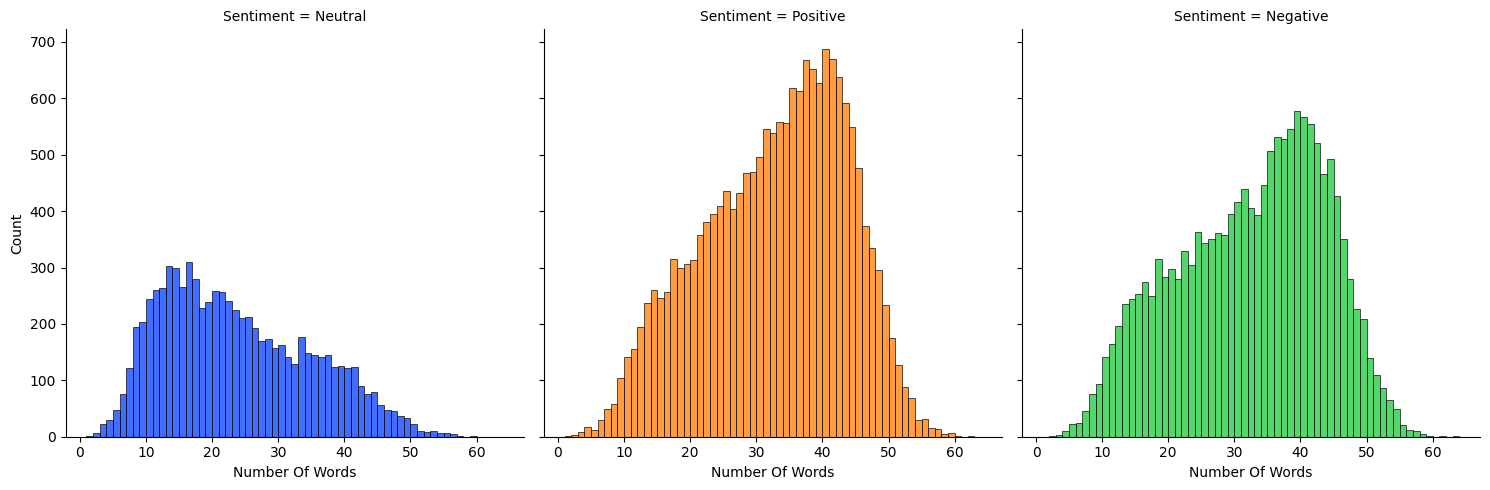

In [34]:
#Creating a new column named "Number Of Words" to store the number of words in each tweet
df["Number Of Words"] = df["OriginalTweet"].str.split().apply(len)

show_dist(df , 'Number Of Words')

The number of words present in tweets of neutral sentiment is far less when compared to tweets with a positive or negative sentiment . Most of the positive and negative sentiment tweets contain almost 40 words on average.

In [35]:
import re

df["Number Of Mentions"] = df["OriginalTweet"].apply(lambda tweet: len(re.findall(r'@[^\s]+', tweet)))




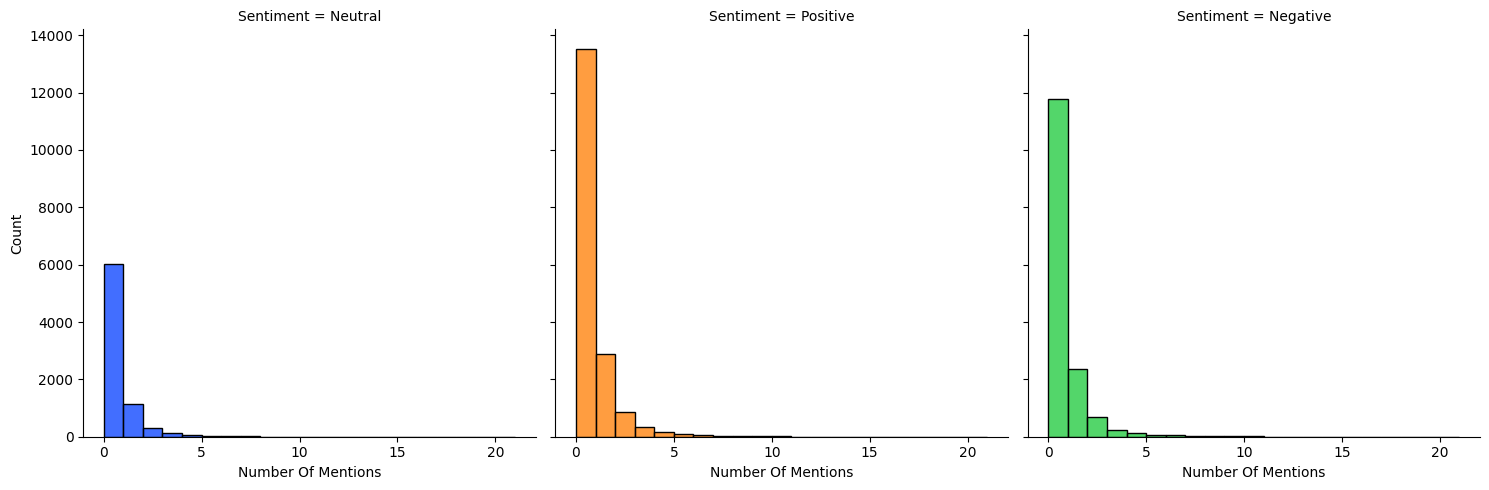

In [36]:
show_dist(df, "Number Of Mentions")

Most of the tweets contain no mention and there is no particular relationship between number of mentions and regard the sentiment.

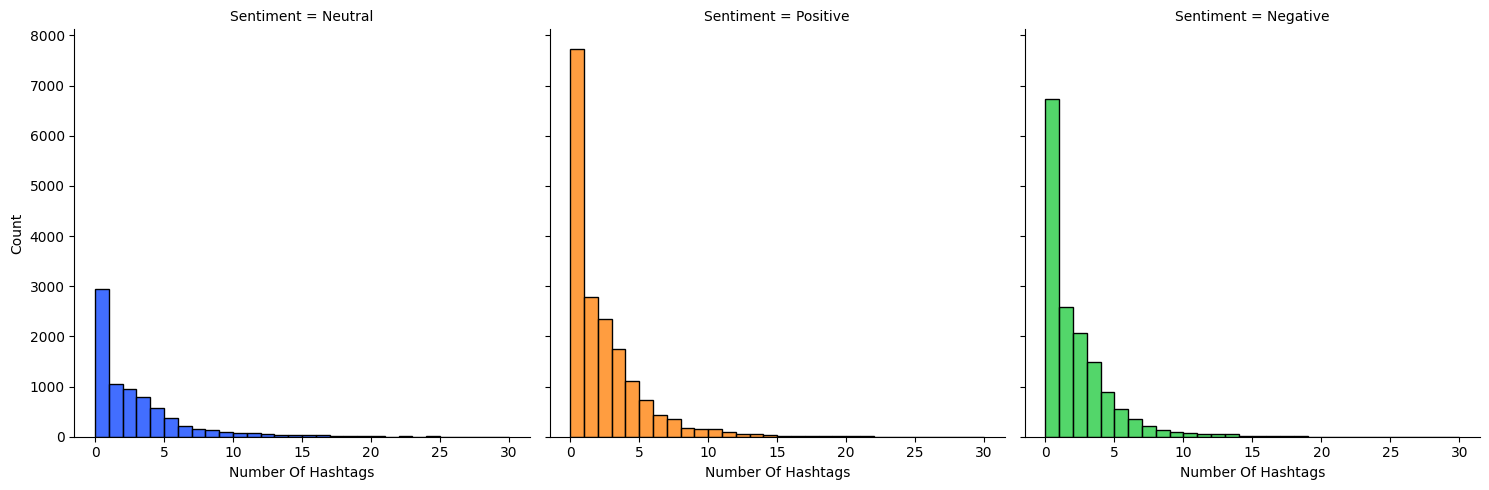

In [37]:
#Creating a new columns named "Number Of Hashtags" to store the number of hastags in each tweet
df["Number Of Hashtags"] = df["OriginalTweet"].apply(lambda tweet : len(re.findall(r'#[^\s]+', tweet)))

show_dist(df, "Number Of Hashtags")

Most of the tweets do not contain a hashtag. Again, the number of hashtags has nothing to do with the sentiment.

Extract hashtags

Let's now try to understand the impact of hashtags on tweets sentiment

In [38]:
def extract_hash_tags(s):
  return [part[1:] for part in s.split() if part.startswith('#')]
df['hashtags']=df['OriginalTweet'].apply(extract_hash_tags)

In [39]:
from collections import Counter

In [40]:
d = Counter(df['hashtags'].sum())
hashtags = pd.DataFrame(list(d.items()), columns=['Hashtag', 'Count'])

In [41]:
#Sorting the hashtags based on their count
hashtags.sort_values(by='Count',ascending=False,inplace=True)

In [42]:
#Checking the dataframe
hashtags

,Hashtag,Count
3,coronavirus,12224
2,COVID19,3204
10,Covid_19,2469
53,Coronavirus,2068
26,COVID2019,1588
...,...,...
8504,WhoDidThis,1
8505,expensive,1
8507,PTCares,1
8508,vlogger,1


In [43]:
import plotly.graph_objs as go

data = {
   "values": hashtags['Count'][:10],
   "labels": hashtags["Hashtag"][:10],  # Corrected column name to "Hashtag"
   "domain": {"column": 0},
   "name": "hashtags",
   "hoverinfo": "label+percent+name",
   "hole": 0.4,
   "type": "pie"
}

# Providing title for the plot
layout = go.Layout(title="<b>Relative Percentage of Top 10 Hashtags</b>", legend=dict(x=0.9, y=0.8, orientation="v"))

# Plotting
fig = go.Figure(data=[data], layout=layout)
fig.update_layout(title_x=0.5)
fig.show()


"Coronavirus" is the most used hashtag.

Let's create a word cloud to visualize the hashtags

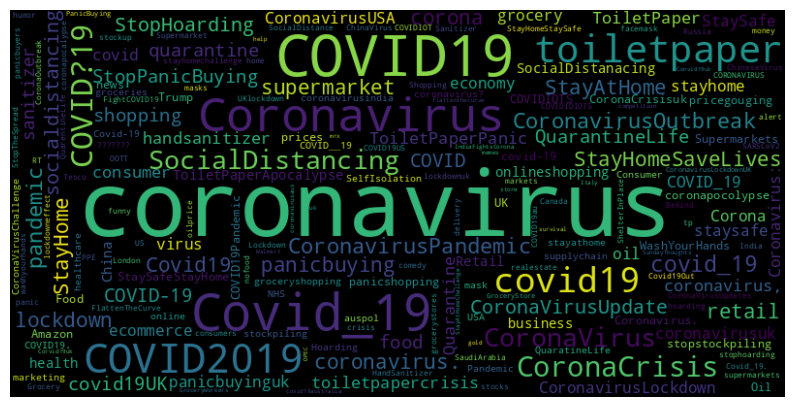

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = dict(zip(hashtags['Hashtag'].tolist(), hashtags['Count'].tolist()))  # Corrected column name to "Hashtag"

# Generate word cloud of hashtags based on their frequency
wc = WordCloud(width=800, height=400, max_words=200, background_color='black').generate_from_frequencies(data)

# Providing figure size
plt.figure(figsize=(10, 10))

# Plotting
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [45]:
df.head()


,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,length,Number Of Words,Number Of Mentions,Number Of Hashtags,hashtags
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday,111,8,3,0,[]
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday,237,38,0,0,[]
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday,131,14,0,0,[]
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday,306,42,0,7,"[COVID19france, COVID_19, COVID19, coronavirus..."
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,Monday,310,40,0,6,"[COVID19, coronavirus, CoronavirusFrance, rest..."


In [46]:
#Creating subsets of the dataframe based on sentiment category Positive, Negative and Neutral
Positive_tweet = df[df["Sentiment"] == "Positive"]
Negative_tweet = df[df["Sentiment"] == "Negative"]
Neutral_tweet = df[df["Sentiment"] == "Neutral"]

In [47]:
def hashtag_freq_graph(df):
  '''This function gives the frequency bar graph of the hashtags'''
  #Extracting hashtags from tweets
  df['hashtag'] = df['OriginalTweet'].apply(lambda twt : re.findall(r"#(\w+)", twt))
  #Taking value count on hashtags
  hashtags=df.OriginalTweet.str.extractall(r'(\#\w+)')[0].value_counts().reset_index()
  #renaming the columns
  hashtags.rename(columns={'index':"hashtag",0:'freq'},inplace=True)

  #Keeping only 15  most frequently used hashtags
  hashtags=hashtags[:15]
  #Seting figuresize
  sns.set(rc = {'figure.figsize':(15,8)})
  #Ploting frequency against hashtag
  sns.barplot(x="hashtag" , y ="freq" , data = hashtags , palette = "bright")
  plt.xticks(rotation=45)
  plt.show()

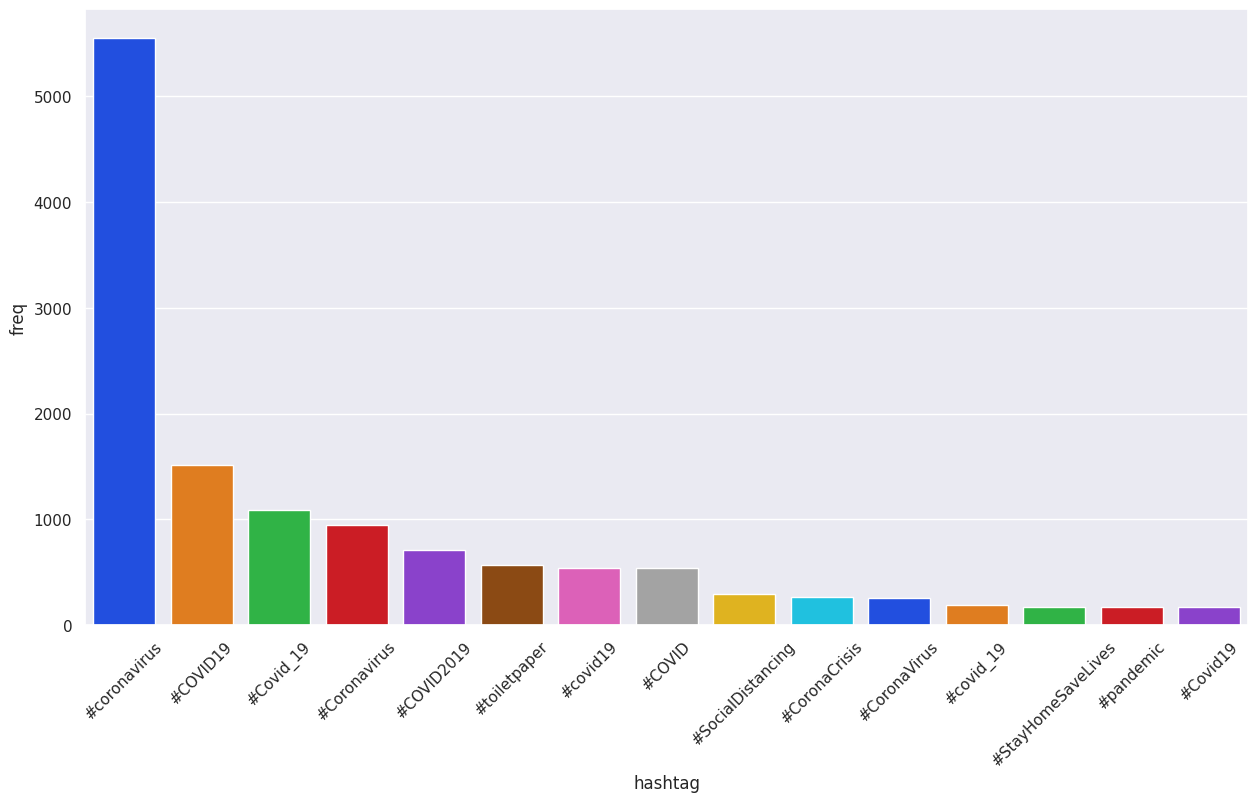

In [48]:
#Calling hashtag_freq_graph on positive tweet dataframe
hashtag_freq_graph(Positive_tweet)

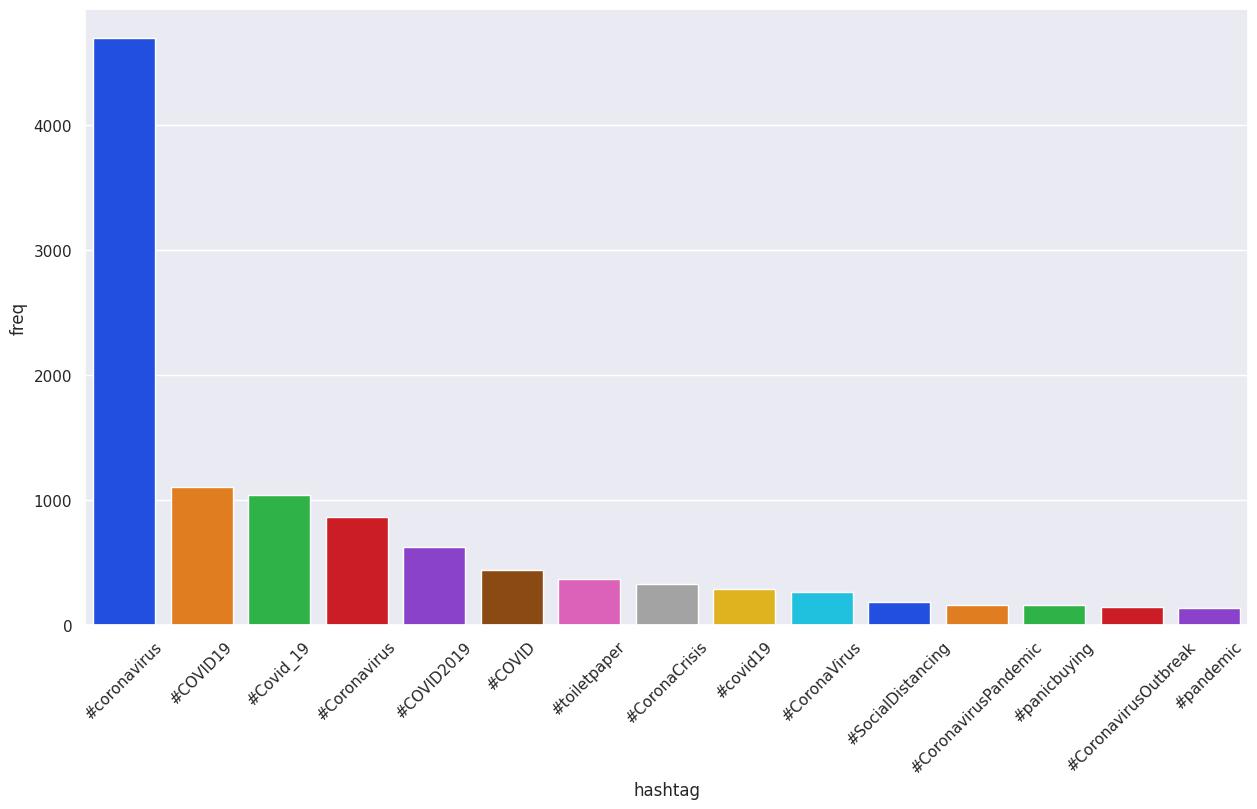

In [49]:
#Calling hashtag_freq_graph on negative tweet dataframe
hashtag_freq_graph(Negative_tweet)


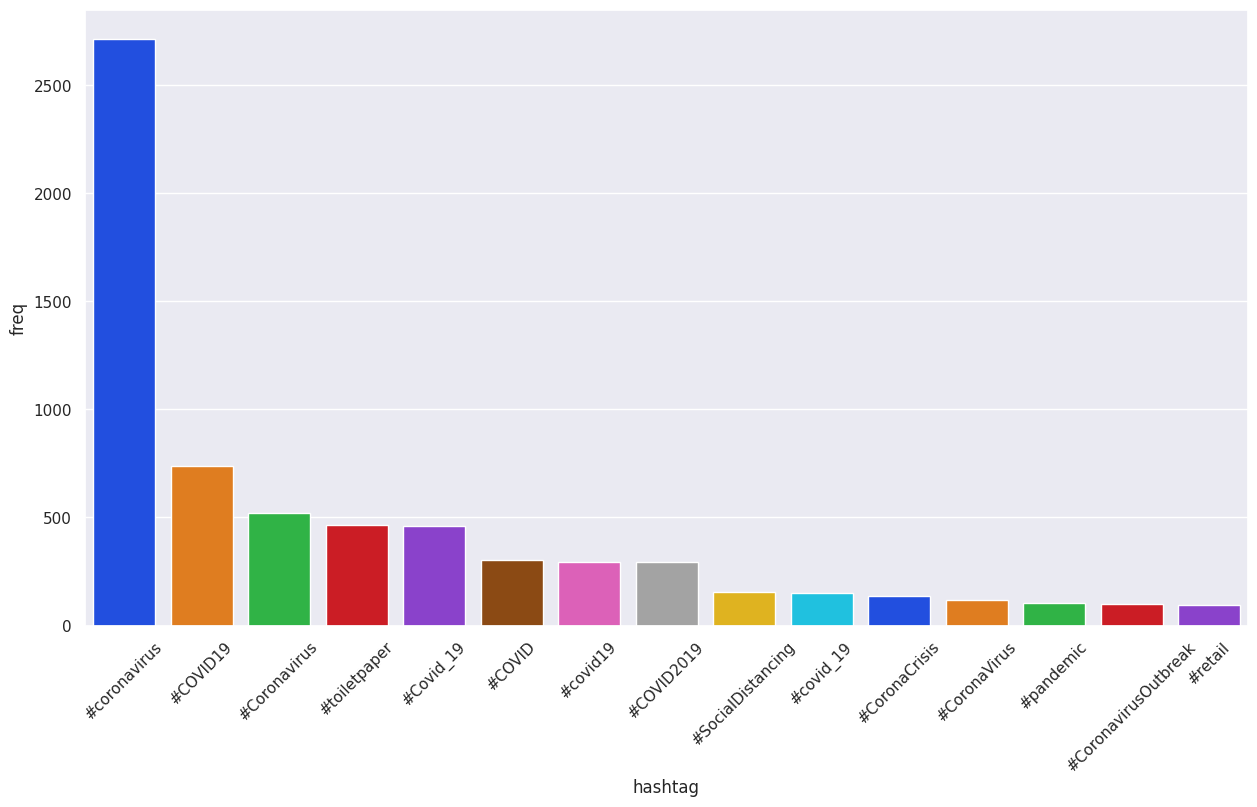

In [50]:
#Calling hashtag_freq_graph on neutral tweet dataframe
hashtag_freq_graph(Neutral_tweet)


By looking at the bar graphs for positive and negative sentiment we can conclude that the hastags like #StayHomesaveLives are much more used in tweets of positive sentiment as compared to the negative sentiment tweets on the other hand hashtags like #panicbuying are more frequently used in negative sentiment tweets

Tokenization

Tokenization is the term used to describe the process of converting the normal text strings in to a list of tokens

In [51]:
#Importing Libraries for NLP
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

Remove user name, links, symbols, spam and numbers

In [52]:
def clean_tweets(tweet):
    #Removes usernames
    tweet = re.sub('@[^\s]+','',tweet)
    #Removes links
    tweet = re.sub('http[^\s]+','',tweet)
    #Removes numbers
    tweet = re.sub(r'\d+','',tweet)
    #Removes special characters
    tweet = re.sub('[^a-zA-Z0-9\s]+','',tweet)
    return tweet

df['cleaned tweet'] = df['OriginalTweet'].apply(clean_tweets)

Expanding Contractions

Contraction is an abbreviated form of a word, like don't stand for do not. This contraction in the text data needs to be expanded for better analysis. It will match the word with the keys, and if it exists it will replace the word with its value.

In [53]:
#Installing contractions
!pip install contractions
!{sys.executable} -m pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.9 MB/s eta 0:00:00
/bin/bash: {sys.executable}: command not found


In [54]:
def contractions_remover(text):
  '''Tis function fixes contractions'''
# creating an empty list
  expanded_words = []
  for word in text.split():
    # using contractions.fix to expand the shotened words
    expanded_words.append(contractions.fix(word))
  #joining words
  expanded_text = ' '.join(expanded_words)
  return expanded_text
#Applying the function contraction remover on the column cleaned tweet
df["cleaned tweet"] = df["cleaned tweet"].apply(contractions_remover)

Remove punctuation and stopwords

Stopwords are those commonly used words that are often added to sentences to make them grammatically correct.They do no add any value to our analysis as these words carry less or no meaning as far as churning out information about the sentiment is concerned

In [55]:
#Downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
#Stpring the set of stopwords in Enlish
stop_words = set(stopwords.words('english'))
print("The stop words in English are",stop_words)
#Creating a whitelist of stopwords we need to keep as they affect the sentiment
whitelist = ["n't", "not", "no" , "nor" , "couldn't" , "wouldn't" ,"isn't" , "haven't" , "wasn't" , "didn't" , "hasn't" , "shouldn't" , "doesn't" , "weren't" ,
              "aren't"]
#Creating a list of stopwords which doesnot contain our whitelist
stops=[item for item in stop_words if item not in whitelist]
print("The required stopwords are",stops)

The stop words in English are {'ma', 'was', 'now', 'do', 'yourself', "you'd", 'll', 'further', 'once', 'm', 'with', 'yourselves', "she's", 'd', 'will', "couldn't", "isn't", 'most', 'won', 'down', "wasn't", 'few', 'out', 'weren', 'themselves', 'needn', 'did', 'y', 'any', 'no', 'they', 'ourselves', 'wasn', 'in', "aren't", 'until', 'some', "won't", 'i', 'aren', 'why', 'doing', 'haven', 'here', "doesn't", "haven't", 'am', 'all', 'a', 'we', 're', 'itself', 'and', 've', "shan't", 'his', 'he', 'very', 'when', 'mustn', 'being', 'should', 'the', 'isn', 'because', 't', 'then', 'up', 'at', 'into', 'after', 'each', 'who', 'above', 'too', "don't", 'my', 'under', 'herself', "hasn't", 'don', 'be', "didn't", 'me', "that'll", 'both', 'while', 'but', 'were', "should've", 'about', 'an', 'she', 'those', 'is', 'more', 'to', 'from', 'what', 'him', 'this', "mustn't", 'as', 'them', 'are', 'there', 'yours', "you're", 'ain', 'mightn', 'against', 'during', 'been', 'doesn', 'for', "wouldn't", 'you', 'own', 'if', 

In [57]:
def text_process(msg):
    '''This function removes punctuations and stopwords from sentences'''
    #Storing characters other than punctuations from sentences
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    #Creating a list of all the words that are not stopwords or are present in whitelist and then joining them to return a sentence
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stops])

In [58]:
#Applying the function text_process on the column cleaned tweet
df['cleaned tweet'] = df['cleaned tweet'].apply(text_process)

Lemmatization

A method that switches any kind of a word to its base root mode is called Lemmatization. It will help us to diminish the number of tokens and hence boost up the entire method

In [59]:
#Downloading packages for Lemmatization
nltk.download('wordnet')

from nltk import word_tokenize
nltk.download('punkt')

from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [61]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [62]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  word_list = word_tokenize(text)
  lemmatized_string = ' '.join([lemmatizer.lemmatize(w , get_wordnet_pos(w)) for w in word_list])
  return lemmatized_string

In [64]:
df["lemmatized_tweet"] = df["cleaned tweet"].apply(lemmatize_text)

In [65]:
df["lemmatized_tweet"][6]

'cashier grocery store share insight covid prove credibility comment civics class know talk'

Tweet Analysis

For visualization purpose, let's create word clouds with words in positive, negative and neutral tweets

In [66]:
from PIL import Image

In [67]:
def word_cloud(tweetSentiment):
  import requests
  "Function to show wordcloud for any textual column"

  # storing words from all tweets
  all_words = ' '.join([text for text in df['lemmatized_tweet'] ])

  #Storing the url of the image that we will use to mask wordcloud
  url = "https://images2.imgbox.com/e0/3c/d7SAy9mI_o.png"

  img = Image.open(requests.get(url, stream=True).raw)

  # converting PIL images into NumPy arrays
  virusMask = np.array(img)

  from wordcloud import WordCloud
  wordcloud = WordCloud(width=2000, height=1000, max_font_size=200,
                            background_color="white", max_words=2000, mask = virusMask,
                            contour_width=1, contour_color="steelblue",
                            colormap="nipy_spectral").generate(all_words)

  plt.figure(figsize=(13, 11))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')

In [68]:
#Creating subsets of the dataframe based on sentiment category Positive, Negative and Neutral
positive=df[df["Sentiment"]=="Positive"]
negative=df[df["Sentiment"]=="Negative"]
neutral=df[df["Sentiment"]=="Neutral"]

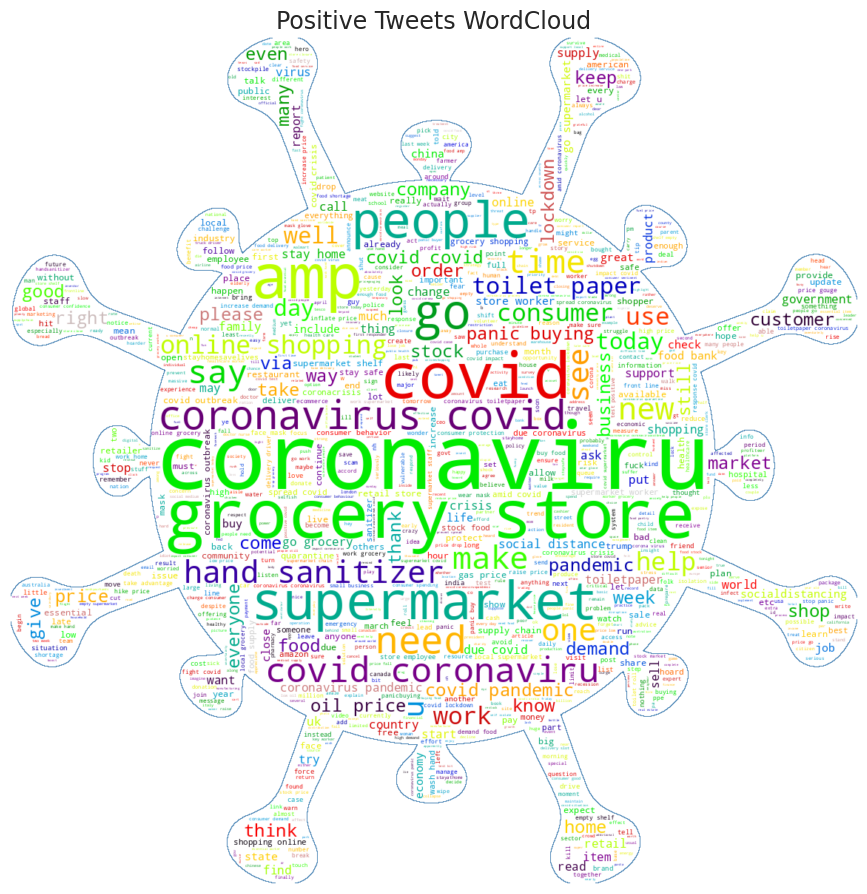

In [69]:
#Creating a word cloud with words in positive tweets
word_cloud(positive)
plt.title("Positive Tweets WordCloud", fontsize=17)
plt.show()

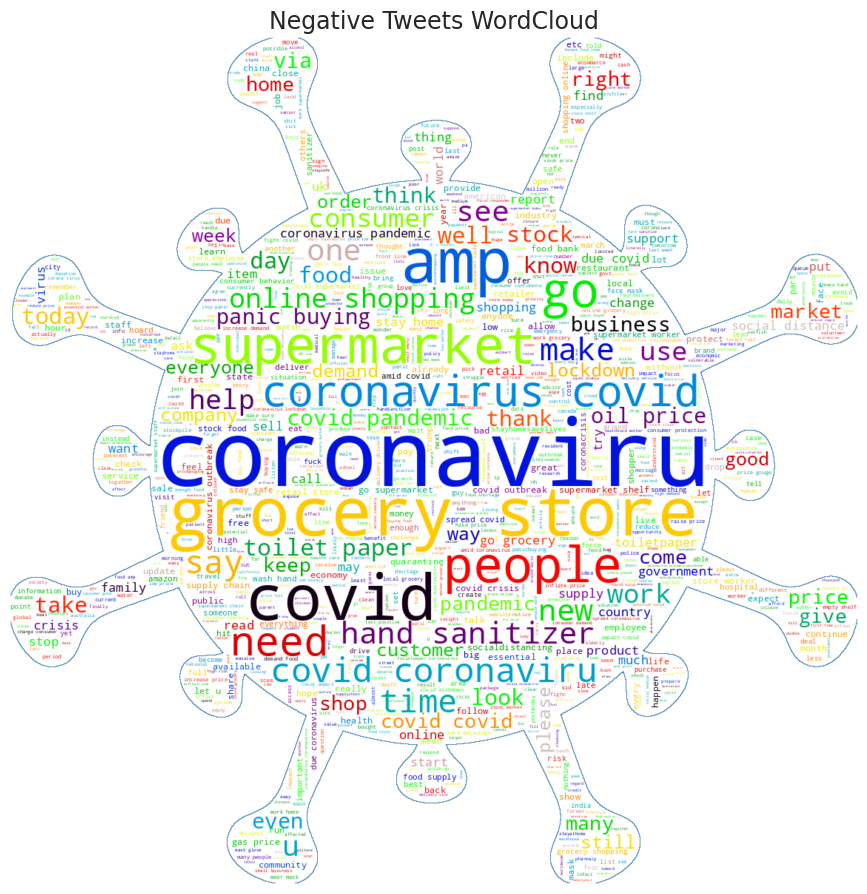

In [70]:
#Creating a word cloud with words in negative tweets
word_cloud(negative)
plt.title("Negative Tweets WordCloud", fontsize=17)
plt.show()

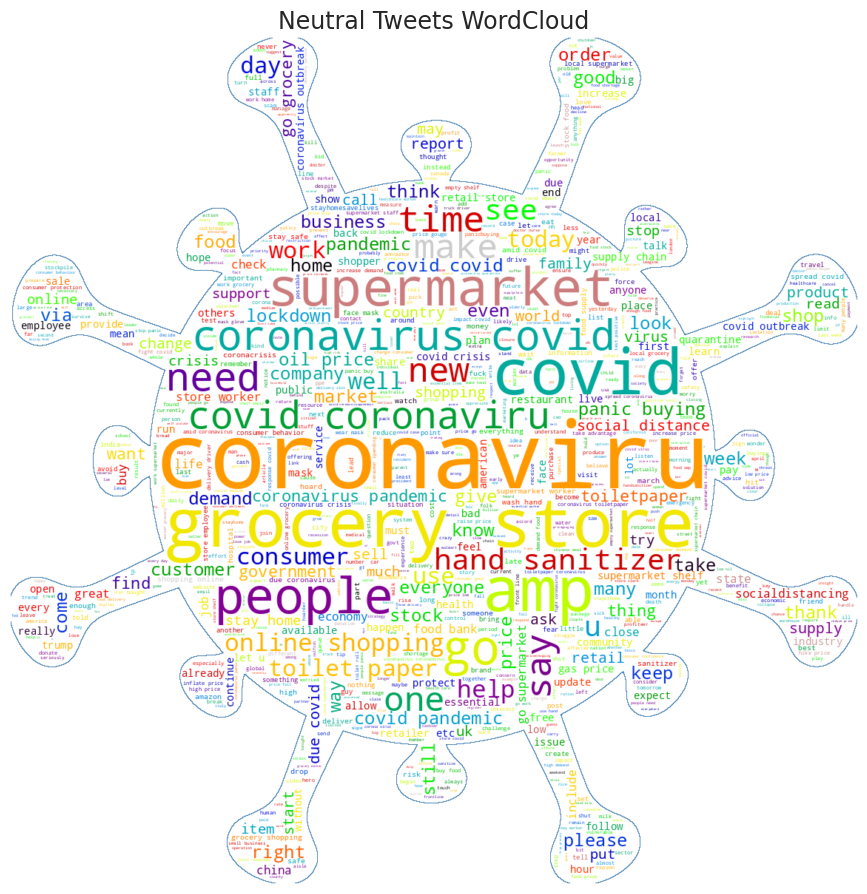

In [71]:
#Creating a word cloud with words in neutral tweets
word_cloud(neutral)
plt.title("Neutral Tweets WordCloud", fontsize=17)
plt.show()

Now, let's try to analyze the most frequently used words in positive,negative and neutral tweets

In [72]:
#Vectorization for Data Visualization
def vectorization(table , col):

    '''Function to calculate the number of each word from a given column of a dataframe'''
    from sklearn.feature_extraction.text import CountVectorizer
    vector = CountVectorizer()

    frequency_matrix = vector.fit_transform(table[col])
    sum_frequencies = np.sum(frequency_matrix, axis=0)

    frequency = np.squeeze(np.asarray(sum_frequencies))
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names_out()).transpose()
    return frequency_df

In [73]:
def word_freq_map(dataframe):

  dataframe.reset_index(inplace=True)
  #Renaming the columns of our dataframe
  dataframe.rename(columns = {'index': "Word" , 0 : "Frequency"} , inplace = True)

  #Sorting our PosFrequency dataset by Frequency values so that we have the top 15 most frequent words present in tweets of positive sentiment
  dataframe = dataframe.sort_values(by = "Frequency" , ascending = False )[:15]

  sns.set(rc = {'figure.figsize':(15,8)})
  sns.barplot(x="Word" , y ="Frequency" , data = dataframe , palette = "bright")

  plt.xticks(rotation=45)
  plt.xlabel("Words", fontsize=15)
  plt.ylabel("Frequency", fontsize=15)


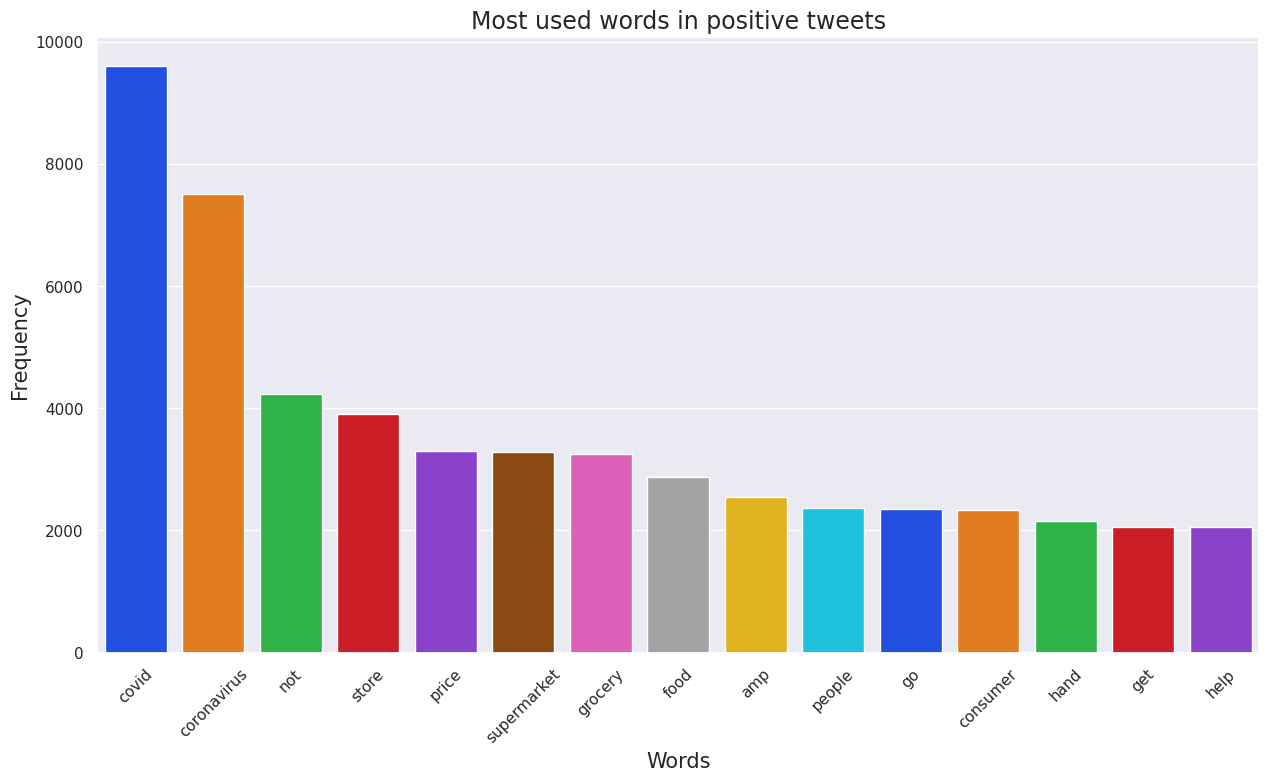

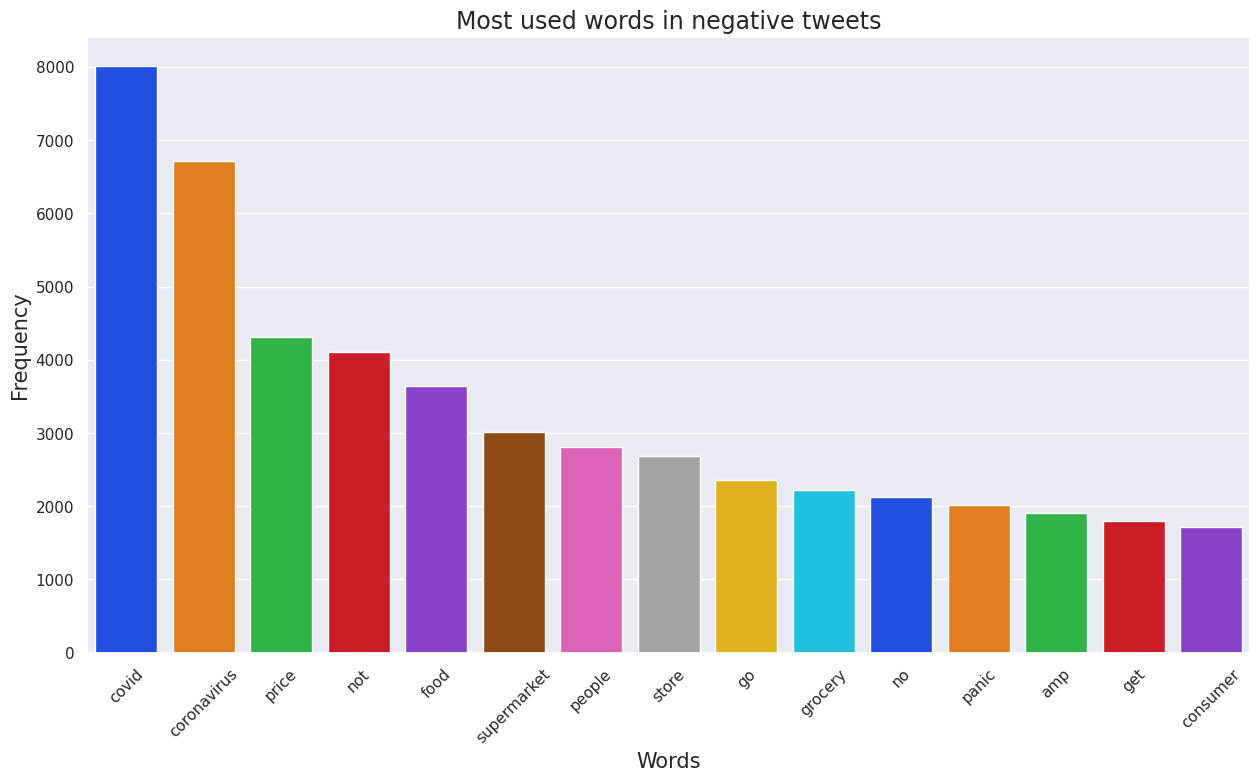

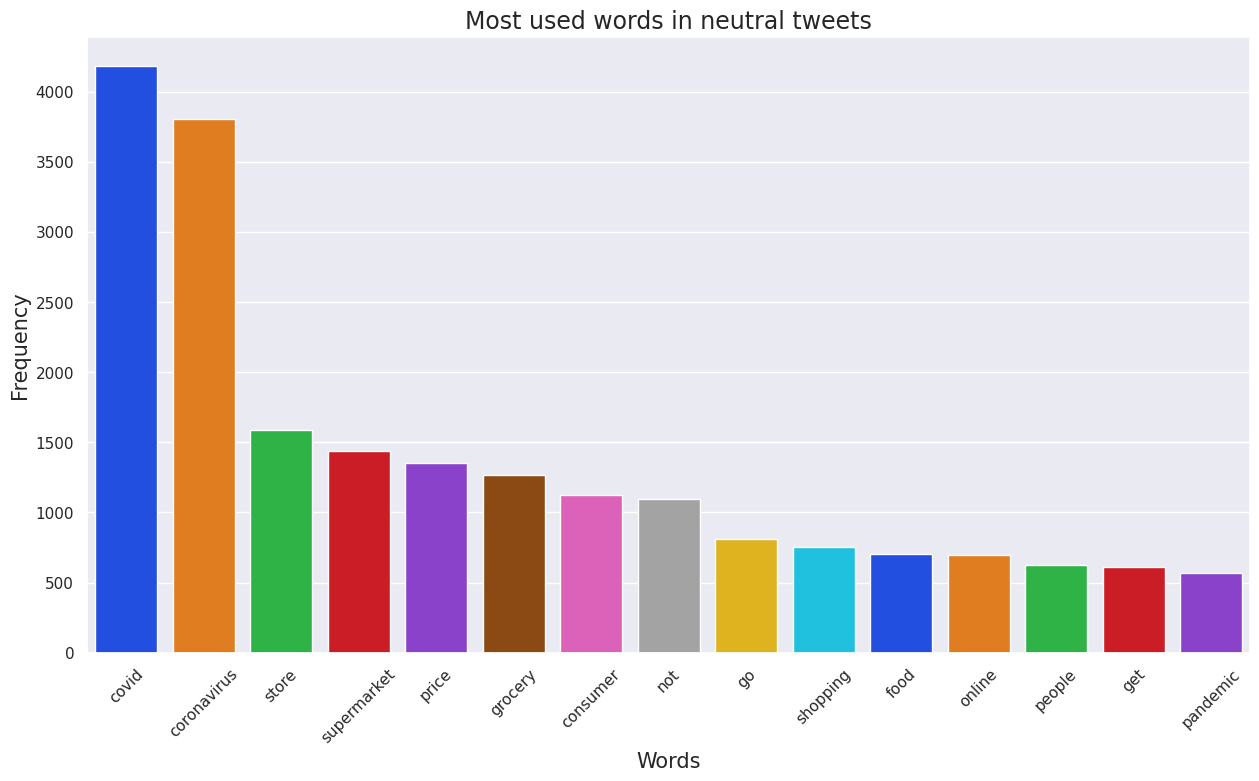

In [74]:
#Creating a subset of our main dataframe that will contain records of only positive sentiment and passing it into vectorization function
Posfrequency_df = vectorization(positive, "lemmatized_tweet")
plt.title("Most used words in positive tweets", fontsize=17)
word_freq_map(Posfrequency_df)
plt.show()

Negfrequency_df = vectorization(negative, "lemmatized_tweet")
plt.title("Most used words in negative tweets", fontsize=17)
word_freq_map(Negfrequency_df)
plt.show()

Neutral_frequency_df = vectorization(neutral, "lemmatized_tweet")
plt.title("Most used words in neutral tweets", fontsize=17)
word_freq_map(Neutral_frequency_df)
plt.show()

1. There are relatively more mentions of words like store, grocery in positive tweets as compared to negative tweets.

2. Panic is in list of top 15 words present in negative tweets but it is absent from the list of positive tweets whereas shopping is in list of top 15 words present in positive tweets but it is absent from top 15 words list of negative tweets

In [75]:
#Library for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
#Library for train test split
from sklearn.model_selection import train_test_split

#Libraries to import models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#Libraries for model evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

#Library for crossvalidation and yperparameter tuning
from sklearn.model_selection import GridSearchCV

Label encoding

We will convert the target variable into numeric form by giving labels 1 for positive tweets, 0 for neutral tweets and -1 for negative tweets so as to convert them into the machine-readable form.

In [76]:
df.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [77]:
#label encoding
encoders_nums = {"Sentiment":{"Positive":1,
                              "Neutral":0,
                              "Negative":-1,}}
df = df.replace(encoders_nums)

In [78]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,length,Number Of Words,Number Of Mentions,Number Of Hashtags,hashtags,cleaned tweet,lemmatized_tweet
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,16,3,Monday,111,8,3,0,[],,
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,1,16,3,Monday,237,38,0,0,[],advice talk neighbours family exchange phone n...,advice talk neighbour family exchange phone nu...
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,1,16,3,Monday,131,14,0,0,[],coronavirus australia woolworths give elderly ...,coronavirus australia woolworth give elderly d...
3,NaN,2020-03-16,My food stock is not the only one which is emp...,1,16,3,Monday,306,42,0,7,"[COVID19france, COVID_19, COVID19, coronavirus...",food stock not one empty please not panic enou...,food stock not one empty please not panic enou...
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",-1,16,3,Monday,310,40,0,6,"[COVID19, coronavirus, CoronavirusFrance, rest...",ready go supermarket covid outbreak not parano...,ready go supermarket covid outbreak not parano...


TF-IDF Vectorization

Inorder to convert the text data into machine readable form, we convert the words to corresponding vectors of real numbers with the help of TFIDF Vectorizer.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the object of Tfidf vectorizer
vectorizer = TfidfVectorizer(max_df=.90,min_df=10)

In [80]:
#fit the vectorizer using the text data
X = vectorizer.fit_transform(df["lemmatized_tweet"]).toarray()
y = df["Sentiment"]

Now, the dataset is ready for applying different classification models

Training the model

We will split the dataset into train and test sets in 80:20 ratio.

In [81]:
#Performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1,stratify=y)

In [82]:
#Checking shape of the train set
print("The shape of the train dataset is:",X_train.shape)

The shape of the train dataset is: (32925, 5189)


In [83]:
#Checking shape of the test set
print("The shape of the test dataset is:",X_test.shape)

The shape of the test dataset is: (8232, 5189)


Evaluation

In [84]:
def Improved_cf_multiclass(cf_matrix):
  '''This function takes the confusion matrix as input and provides a labeled heatmap of the confusion matrix.'''
  #Defining labels
  group_names = [ "True Neg" ,"False Neutral" ,"False Pos" ,"False Neg","True Neutral" ,"False Pos","False Neg", "False Neutral" ,"True Pos"]
  #Flattening the 3D array to one dimension
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  #Zipping curresponding label and value
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
  #Reshaping back to 3D array
  labels = np.asarray(labels).reshape(3,3)

  #Creating a heatmap for the given confusion matrix with labels created
  ax = sns.heatmap(cf_matrix , annot=labels, fmt='', cmap='Blues')
  #Set title, x-label and y-label
  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  #Setting x-ticks and y-ticks
  ax.xaxis.set_ticklabels(['-1','0',"1"])
  ax.yaxis.set_ticklabels(['-1','0',"1"])
  #show the heatmap
  plt.show()

In [85]:
#Creating a list of evalation metrics
scoring_list = [accuracy_score , precision_score, recall_score , f1_score]

In [86]:
def classification_results(Y_true, Y_pred , scoring_list , average = None  ):

  '''Function to evaluate our model after training using different types
  of regression evaluation metrics and show all in a dataframe '''
  #Creating a deafult dictionary
  evaluation_dict = defaultdict(list)

  for count, scoring_metric in enumerate(scoring_list):
    #Appending the scoring metric's names to the dictionary
    evaluation_dict["scoring"].append(scoring_metric.__name__)

    #For accuracy score average=None
    if count == 0 or average is None:
      metric_value = scoring_metric((Y_true), (Y_pred))
    else:
      #For other metrics average=average
      metric_value = scoring_metric((Y_true), (Y_pred) , average = average )

    #Appending the value of the curresponding metric to the dictionary
    evaluation_dict["Value"].append('{:f}'.format(metric_value))

  #Creating a dataframe from the dictionary
  evaluation_df = pd.DataFrame(evaluation_dict)
  return evaluation_df

Naive Bayes

Here, we are using MultinomialNB as baseline model.

In [87]:
#Creating an instance of the model MultinomialNB
model = MultinomialNB()
#Fitting the model on the train dataset
model.fit(X_train,y_train)

#Making prediction on our train and test dataset
nb_pred_train = model.predict(X_train)
nb_pred_test = model.predict(X_test)

#Storing train and test accuracy scores
nb_train_accuracy=accuracy_score(y_train,nb_pred_train)
nb_test_accuracy=accuracy_score(y_test,nb_pred_test)

#printing train and test accuracy scores
print("Training accuracy Score    : ", model.score(X_train,y_train))
print("Test accuracy Score : ", nb_test_accuracy )

#printing classification report for the performance of train and test set
print("\n","Naive Bayes-Classification Report for train dataset","\n")
print(classification_report(y_train,nb_pred_train))
print("Naive Bayes-Classification Report for test dataset","\n")
print(classification_report(y_test,nb_pred_test))

Training accuracy Score    :  0.7239787395596051
Test accuracy Score :  0.6717687074829932

 Naive Bayes-Classification Report for train dataset 

              precision    recall  f1-score   support

          -1       0.76      0.77      0.77     12318
           0       0.84      0.27      0.41      6170
           1       0.69      0.88      0.77     14437

    accuracy                           0.72     32925
   macro avg       0.76      0.64      0.65     32925
weighted avg       0.74      0.72      0.70     32925

Naive Bayes-Classification Report for test dataset 

              precision    recall  f1-score   support

          -1       0.70      0.72      0.71      3080
           0       0.71      0.19      0.30      1543
           1       0.65      0.84      0.73      3609

    accuracy                           0.67      8232
   macro avg       0.69      0.58      0.58      8232
weighted avg       0.68      0.67      0.64      8232



In the classification report we can notice that the recall value for neutral labels are very low which means that the model is performing bad when it comes to correctly classifying neutral labels as it is wrongly classifying them into positives and negative sentiment tweets

Stochastic Gradient Descent Classifier

In [92]:
#Creating an instance of the model Stochastic Gradient Descent-SGD Classifier
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
#Fitting the model on the train dataset
sgd_clf.fit(X_train,y_train)

#Making prediction on our train and test dataset
sgd_train_pred = sgd_clf.predict(X_train)
sgd_test_pred = sgd_clf.predict(X_test)

#Storing train and test accuracy scores
sgd_train_accuracy = accuracy_score(y_train,sgd_train_pred)
sgd_test_accuracy = accuracy_score(y_test,sgd_test_pred)

#printing train and test accuracy scores
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Test accuracy Score : ",sgd_test_accuracy )

#printing classification report for the performance of train and test set
print("\n","SGD-Classification Report for train dataset","\n")
print(classification_report(sgd_train_pred,y_train))
print("SGD-Classification Report for test dataset","\n")
print(classification_report(sgd_test_pred,y_test))

Training accuracy Score    :  0.8414882308276386
Test accuracy Score :  0.7951895043731778

 SGD-Classification Report for train dataset 

              precision    recall  f1-score   support

          -1       0.90      0.81      0.85     13743
           0       0.63      0.90      0.74      4299
           1       0.88      0.86      0.87     14883

    accuracy                           0.84     32925
   macro avg       0.80      0.85      0.82     32925
weighted avg       0.86      0.84      0.84     32925

SGD-Classification Report for test dataset 

              precision    recall  f1-score   support

          -1       0.87      0.76      0.82      3529
           0       0.52      0.82      0.63       975
           1       0.85      0.82      0.83      3728

    accuracy                           0.80      8232
   macro avg       0.75      0.80      0.76      8232
weighted avg       0.82      0.80      0.80      8232



SGD Classifier gives better score as compared to Naive Bayes and is found to perform well in the classification

Logistic Regression

In [96]:
#Creating an instance of the model LogisticRegression
logreg = LogisticRegression()
#Fitting the model on the train dataset
logreg.fit(X_train, y_train)

#Making prediction on our train and test dataset
logreg_pred_train = logreg.predict(X_train)
logreg_pred_test = logreg.predict(X_test)

#Storing train and test accuracy scores
logreg_train_accuracy = accuracy_score(y_train,logreg_pred_train)
logreg_test_accuracy = accuracy_score(y_test,logreg_pred_test)

#printing train and test accuracy scores
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_test_accuracy )

#printing classification report for the performance of train and test set
print("\n","LogisticRegression-Classification Report for train dataset","\n")
print(classification_report(logreg_pred_train,y_train))
print("LogisticRegression-Classification Report for test dataset","\n")
print(classification_report(logreg_pred_test,y_test))

Training accuracy Score    :  0.8696431283219438
Test accuracy Score :  0.8126822157434402

 LogisticRegression-Classification Report for train dataset 

              precision    recall  f1-score   support

          -1       0.88      0.87      0.88     12480
           0       0.76      0.87      0.81      5382
           1       0.91      0.87      0.89     15063

    accuracy                           0.87     32925
   macro avg       0.85      0.87      0.86     32925
weighted avg       0.87      0.87      0.87     32925

LogisticRegression-Classification Report for test dataset 

              precision    recall  f1-score   support

          -1       0.83      0.83      0.83      3064
           0       0.67      0.76      0.71      1352
           1       0.86      0.82      0.84      3816

    accuracy                           0.81      8232
   macro avg       0.79      0.80      0.79      8232
weighted avg       0.82      0.81      0.81      8232



SVM

In [98]:
#Creating an instance of the model LinearSVC
SVC = LinearSVC()
#Fitting the model on the train dataset
SVC.fit(X_train, y_train)

#Making prediction on our train and test dataset
SVC_pred_train = SVC.predict(X_train)
SVC_pred_test = SVC.predict(X_test)

#Storing train and test accuracy scores
SVC_train_accuracy = accuracy_score(y_train,SVC_pred_train)
SVC_test_accuracy = accuracy_score(y_test,SVC_pred_test)

#printing train and test accuracy scores
print("Training accuracy Score    : ",SVC.score(X_train,y_train))
print("Test accuracy Score : ",SVC_test_accuracy )

#printing classification report for the performance of train and test set
print("\n","LinearSVC-Classification Report for train dataset","\n")
print(classification_report(SVC_pred_train,y_train))
print("LinearSVC-Classification Report for test dataset","\n")
print(classification_report(SVC_pred_test,y_test))

Training accuracy Score    :  0.8998025816249051
Test accuracy Score :  0.8180272108843537

 LinearSVC-Classification Report for train dataset 

              precision    recall  f1-score   support

          -1       0.91      0.90      0.91     12519
           0       0.82      0.89      0.85      5657
           1       0.92      0.90      0.91     14749

    accuracy                           0.90     32925
   macro avg       0.88      0.90      0.89     32925
weighted avg       0.90      0.90      0.90     32925

LinearSVC-Classification Report for test dataset 

              precision    recall  f1-score   support

          -1       0.83      0.84      0.83      3061
           0       0.69      0.73      0.71      1444
           1       0.86      0.84      0.85      3727

    accuracy                           0.82      8232
   macro avg       0.79      0.80      0.80      8232
weighted avg       0.82      0.82      0.82      8232



Accuracy score of SVM is 0.818 which is slightly higher than logistic regression and the best one among all the models.

Comparison dataframe for all the models

In [99]:
#Creating a comparison dataframe for all te models containing train and test accuracy
models = pd.DataFrame({'Model': ['Naive Bayes',  "Stochastic Gradient Decent","Logistic Regression","Support Vector Machine"],
    'Train accuracy': [nb_train_accuracy,  sgd_train_accuracy, logreg_train_accuracy, SVC_train_accuracy],
    'Test accuracy': [nb_test_accuracy,  sgd_test_accuracy, logreg_test_accuracy, SVC_test_accuracy]})
#Sorting the dataframe based on test accuracy
models.sort_values(by="Test accuracy",ascending=False,inplace=True)

In [100]:
print("Comparison dataframe for all the models based on accuracy scores of train and test dataset is:","\n")
# Scores are rounded up to 2 decimals
models.reset_index(inplace=True,drop=True)
models.round(2)

Comparison dataframe for all the models based on accuracy scores of train and test dataset is: 



,Model,Train accuracy,Test accuracy
0,Support Vector Machine,0.90,0.82
1,Logistic Regression,0.87,0.81
2,Stochastic Gradient Decent,0.84,0.80
3,Naive Bayes,0.72,0.67


Comparing the test accuracy score of all the models, SVM is found to be the best performing model in terms of accuracy.

Conclusion

Thus we conclude our project on COVID 19 Tweet Sentiment Analysis. We started by analyzing the dataset to learn more about the variables involved. As a part of Exploratory Data Analysis, we tried to derive different patterns in the data. For building different classification models we used feature 'OriginalTweet' and the target variable 'Sentiment'. By performing tweet cleaning, Tokenization, Lemmatization and Vectorization, 'OriginalTweet' was prepared for modelling.

We applied 4 different classification models among which SVM is the best performing model.

Linear SVM with 85% accuracy performed well for multinomial classification.